In [ ]:
import os
import random
import torch

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pywt
from skimage import feature, filters

(1207, 1184)


(-0.5, 1183.5, 1206.5, -0.5)

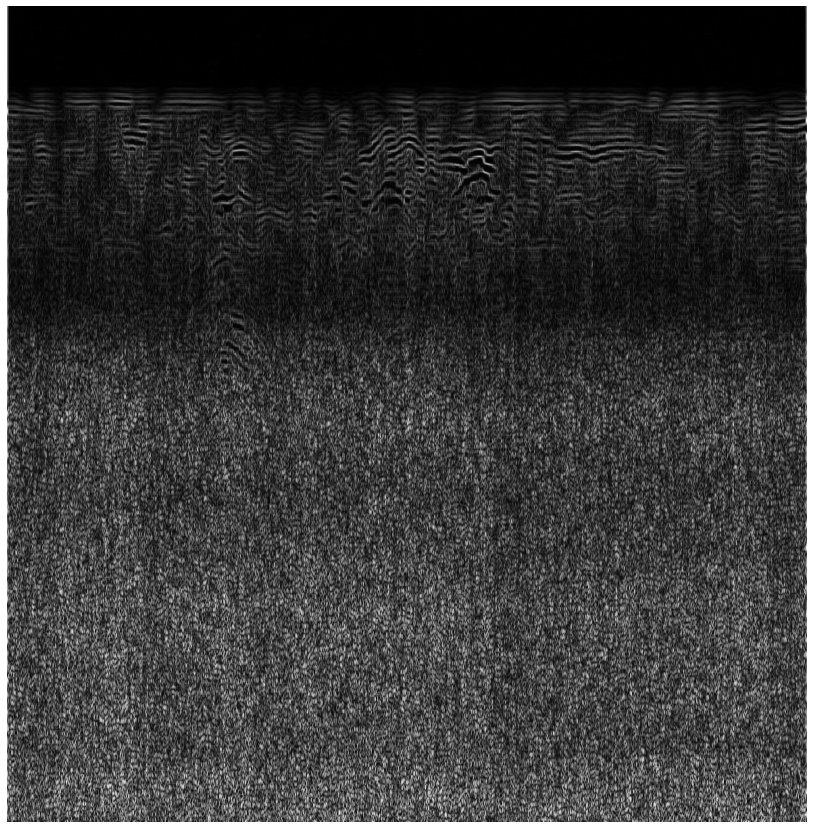

In [ ]:
engine_dir = '/content/gdrive/MyDrive/EngineCapstone'
orig_data_dir = os.path.join(engine_dir, 'UW')
test_im_fn = 'WLT_350_210926 P_2111131 WLT_350_210926__010 P_2111131.JPG'
crop_axes_idx = 63

#im_fns = os.listdir(orig_data_dir)

im_path = os.path.join(engine_dir, orig_data_dir, test_im_fn)
im = Image.open(im_path)
im = im.convert('L')
im = im.crop((crop_axes_idx, 0, im.size[0], im.size[1]))
#print(im.format, im.size, im.mode)
#display(im)

im_np = np.array(im)
print(im_np.shape)
edges = filters.sobel(im_np)
plt.figure(figsize=(15,15))
plt.imshow(edges, cmap='gray')
plt.axis('off')

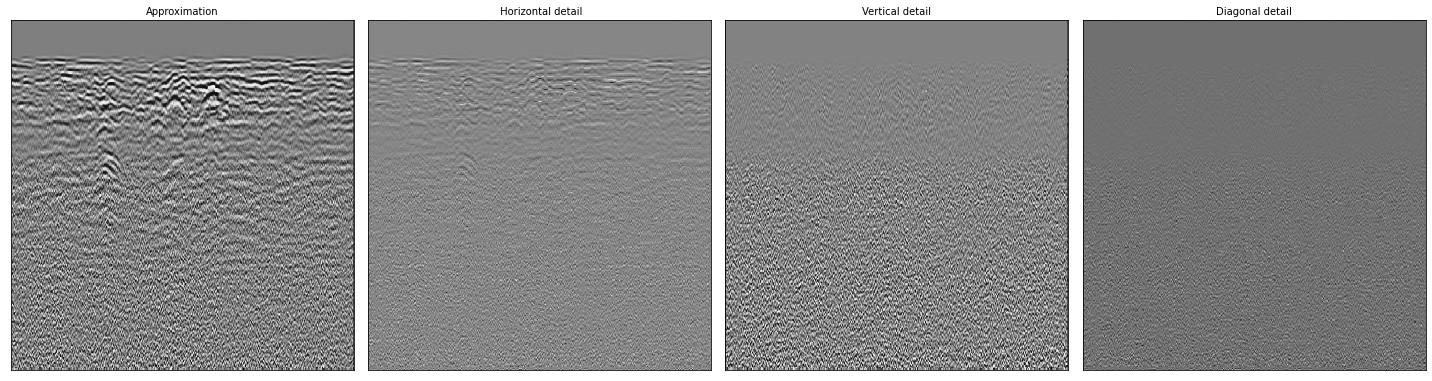

In [ ]:
# Load image
#original = pywt.data.camera()
original = im_np

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(20, 20))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

[[ True  True False ... False  True  True]
 [ True  True False ... False  True  True]
 [ True  True False ... False  True  True]
 ...
 [False  True False ...  True False False]
 [False  True False ...  True  True False]
 [False  True False ...  True  True False]]
-120.625
109.56250000000001


(-0.5, 1183.5, 1206.5, -0.5)

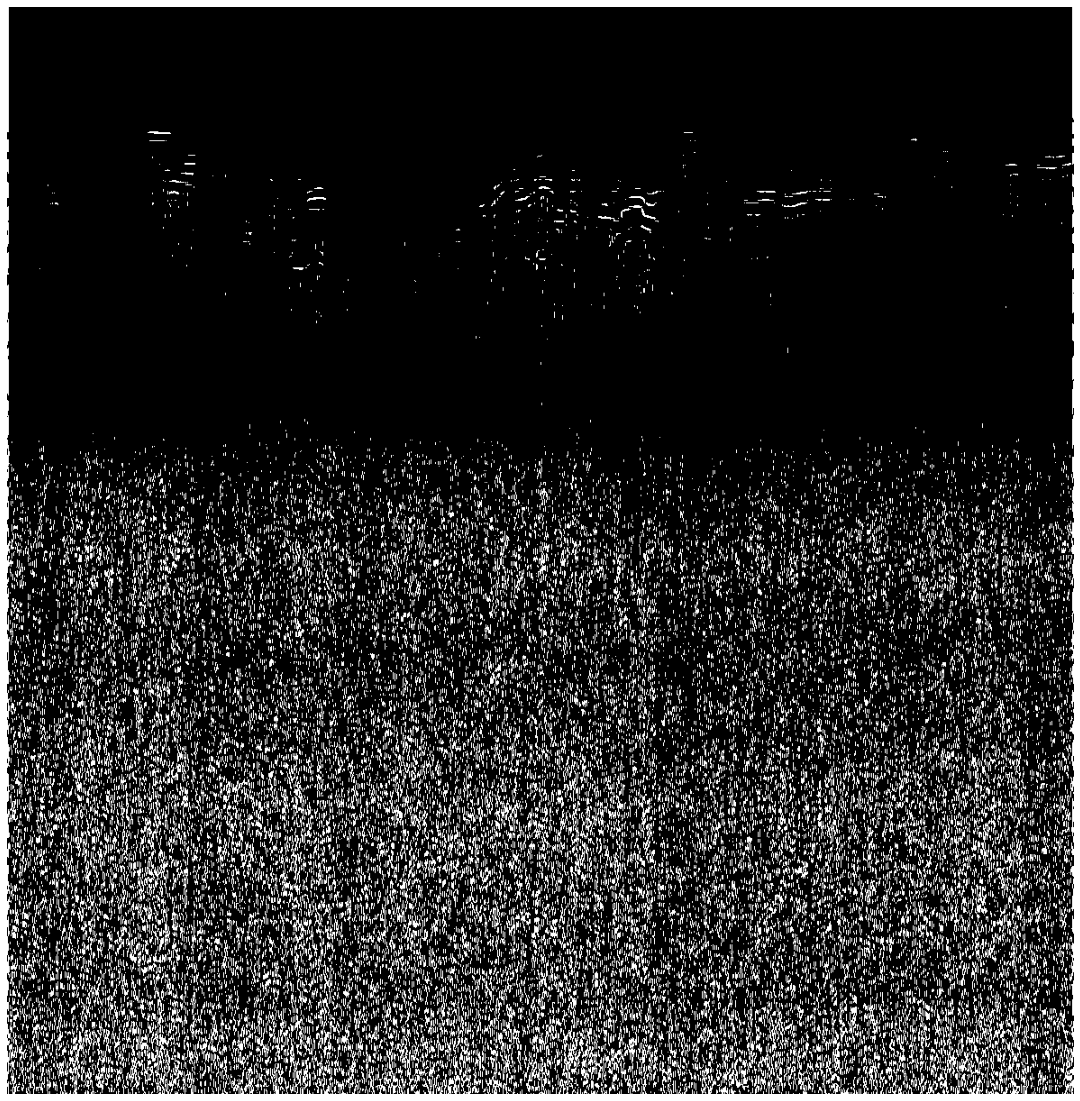

In [ ]:
original = im_np

coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
mask1 = LH < np.max(LH) * 0.2
mask2 = HH < np.max(HL) * 0.2
mask = edges > np.max(edges) * 0.4
print(mask)
print(np.min(LH))
print(np.max(LH))

plt.figure(figsize=(20,20))
plt.imshow(mask, cmap='gray')
plt.axis('off')